In [1]:
import sys
sys.path.append("../") # go to parent dir

from time import time
import iarray as ia

import numpy as np
import matplotlib.pyplot as plt

In [2]:
DTYPE = np.float64
NTHREADS = 8
CLEVEL = 5
CLIB = ia.LZ4

cparams = dict(clib=CLIB, clevel=CLEVEL, nthreads=NTHREADS)

In [6]:
shape_ = 8000
chunkshape_ = 4000
blockshapes_ = [200, 250, 320, 400, 500, 800, 1000, 1600, 2000]

In [7]:
t_ia = []
nrep = 1
for blockshape_ in blockshapes_:
    shape = (shape_, shape_)
    chunkshape = (chunkshape_, chunkshape_)
    blockshape = (blockshape_, blockshape_)

    storage = ia.StorageProperties("blosc", chunkshape, blockshape)
    
    a = ia.linspace(ia.dtshape(shape, dtype=DTYPE), 0, 1, storage=storage, **cparams)
    b = ia.linspace(ia.dtshape(shape, dtype=DTYPE), 0, 1, storage=storage, **cparams)

    
    def ia_matmul(a, b):
        return ia.parallel_matmul5(a, b, storage=storage, **cparams)

    t0 = time()
    for _ in range(nrep):
        c = ia_matmul(a, b)
    t1 = time()
    t = (t1 - t0) / nrep
    t_ia.append(t)
    print("- Time for computing matmul (iarray): %.3f" % (t))

- Time for computing matmul (iarray): 16.320
- Time for computing matmul (iarray): 15.201
- Time for computing matmul (iarray): 14.727
- Time for computing matmul (iarray): 12.850
- Time for computing matmul (iarray): 12.519
- Time for computing matmul (iarray): 11.256
- Time for computing matmul (iarray): 11.234
- Time for computing matmul (iarray): 15.046
- Time for computing matmul (iarray): 10.661
- Time for computing matmul (iarray): 11.145


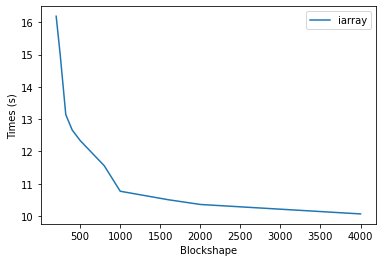

In [5]:
plt.plot(blockshapes_, t_ia, label="iarray")


plt.ylabel("Times (s)")
plt.xlabel("Blockshape")
plt.legend()
plt.show()